In [1]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from scipy import stats
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from IPython.display import display, Math, Latex
from sympy.abc import x
from sympy import Poly
from sympy.solvers.inequalities import solve_rational_inequalities
%matplotlib inline 

# Assignment 1

You are given the assignment to verify Ohm’s law in the lab. In one form, Ohm’s Law states that voltage divided by resistance is equal to current:   
𝑈 / 𝑅 = 𝐼 

You have a R = 100Ω Resistor, and measure the current going through the resistor at different voltages:

In [3]:
U = [-10,-5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100] 
I = [0.15, -0.1 , -0.1 ,  0.1 ,  0.15,  0.25,  0.25,  0.4 ,  0.4 , 0.55,  0.35,  0.35,  0.65,  0.7,  4.2 ,  0.75,  0.6, 0.7,  0.9 ] 
print('The Voltage U is the independent variable. Make a full linear regression analysis.')

The Voltage U is the independent variable. Make a full linear regression analysis.


When making a full linear regression analysis , the following steps should be included:

1.Plot x and y data to confirm some sort of linear relationship

2.Remove outliers if there is any. This is a qualitative assessment

3.Determine the slope ß and the intersection α. 

4.Test the assumption that the errors/residuals are normally distributed:

    1.Plot the residuals against the x-values. Is the error independent of time?
    2.Make the probability plot, to test whether the error is normal distributed. Are the points on a straight line?

5.Test the adequacy of the model 
    
    1.Could the Slope ß = 0?  Calculate the P-value for that
    2.Calculate the correlation coefficient r, and the coefficient of determination R**2. Discuss the result. 
    
6.Calculate the confidence interval for the slope, ß and the intersection,α.

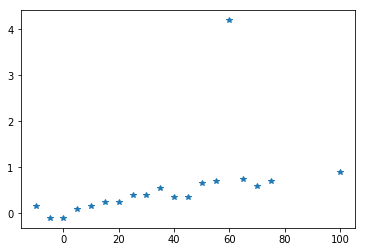

In [6]:
#1.Plot x and y data to confirm some sort of linear relationship
plt.plot(U,I,'*')   # the plot plots x, y respectively. In this case U is x and I is y (Doesn't mateer in this case)
plt.show()

In [7]:
# 2. Remove outliers if there is any. This is a qualitative assessment

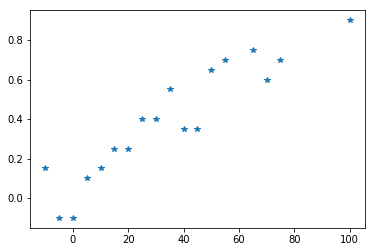

In [9]:
I = [0.15, -0.1 , -0.1 ,  0.1 ,  0.15,  0.25,  0.25,  0.4 ,  0.4 , 0.55,  0.35,  0.35,  0.65,  0.7  #,  4.2  the outlier is removed
     ,  0.75,  0.6, 0.7,  0.9 ] 
U = [-10,-5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55
     #, 60 REMOVING THE CORRESPONDING POINT IN X
     , 65, 70, 75, 100] 

plt.plot(U,I,'*')  
plt.show()

In [11]:
#3.Determine the slope ß and the intersection α.

#These are 3 different ways of calculating beta:
beta = sum((U-U.mean())*(I-I.mean()))/sum((U-U.mean())**2) 
print('beta1 = ', beta)   
beta = sum((U*I-U.mean()*I.mean()))/sum((U-U.mean())**2) 
print('beta2 = ', beta) 
beta = np.cov(U,I)[0,1]/np.var(U, ddof=1) 
print('beta3 = ', beta) 

#Claulating alfa:
alfa = I.mean()-beta*U.mean() 
print('alfa = ', alfa)   

beta1 =  0.008860703941016413
beta2 =  0.008860703941016413
beta3 =  0.008860703941016413
alfa =  0.08400333538137461


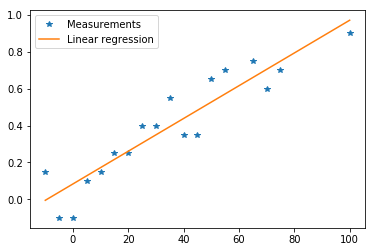

In [12]:
#OPTIONAL:
# I plot the line, together with the data, to see if it makes sense. 
I_pred = alfa + beta*U # predicts the current, I based on alfa and beta 
plt.plot(U,I, '*', label='Measurements') 
plt.plot(U,I_pred, label='Linear regression') 
plt.legend(loc=0) # show the labels in the top left corner plt.show() 

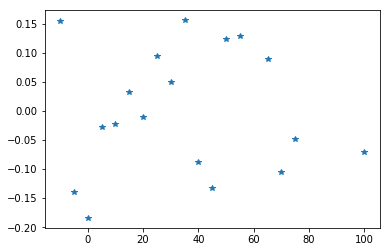

In [14]:
#4.Test the assumption that the errors/residuals are normally distributed:
#    1.Plot the residuals against the x-values. Is the error independent of time?

#I think we don't consider time here so we ignore the question is the error independent of time.

# error = yi - y hat i
e = I-I_pred # calculates the residuals/error of the model 
plt.plot(U,e, '*') 
plt.show() 

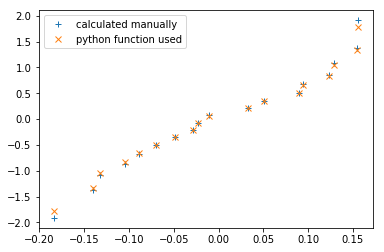

In [18]:
#4.2.Make the probability plot, to test whether the error is normal distributed. Are the points on a straight line?
n=len(U)   #number of samples
e_sort=np.sort(e)    #the observations are ranked from smallest to largest
j = np.arange(1,n+1) #j is the numbering of/for the errors from 1 to n
ocf = (j-0.5)/n       #observed cumulative frequency, ocf = (j-0.5)/n
plt.plot(e_sort,stats.norm.ppf(ocf),'+', label = 'calculated manually')  #the ordered errors are plotted against the appropiate
#percentile (norm.ppf,uniform.ppf, t.ppf ....) of the ocf.

osm, osr =stats.probplot(e, dist=stats.norm) 
plt.plot(osm[1],osm[0],'x', label = 'python function used') 
plt.legend(loc=0) # show the labels in the top left corner 
plt.show() 

In [19]:
#We can see the points try to follow a straight line. If it is a straight line is normally distributed
print('It is somewhat on a straight line. Its a fine approximation, that the error is normally distributed. ') 

It is somewhat on a straight line. Its a fine approximation, that the error is normally distributed. 


In [22]:
#5.Test the adequacy of the model
#5.1.Could the Slope ß = 0?  Calculate the P-value for that

#We make a hypothesis to check that:
# H0 : ß = 0
# H1 : ß != 0

#We calculate the p-value:
SSE = sum(e**2) #sum of square error
s2  = SSE/(n-2) # the Estimated variance of the error 
Sxx = sum((U-U.mean())**2) 
t0=beta/np.sqrt(s2/Sxx)   
p_val = 2*(1-stats.t.cdf(abs(t0), df=n-2)) 
print('p_val = ', p_val)


#Another way of calculating the p-value: 
p_val = 2*stats.t.cdf(0, df=n-2, loc=beta, scale=np.sqrt(s2/Sxx))  
# the function can also take care of the scale and location 
print('p_val = ', p_val) # same value as before. 

print('As this value is lower than 0.05, we can reject the hypothesis that the slope is 0.') 

p_val =  2.7594123430674244e-08
p_val =  2.7594123269945478e-08
As this value is lower than 0.05, we can reject the hypothesis that the slope is 0.


In [23]:
#5.2.Calculate the correlation coefficient r, and the coefficient of determination R**2. Discuss the result.

#There are 3 ways of calculating r

#1 using covariance and variance of X and Y ( U and I in this case)
r = np.cov(U,I)[0,1]/np.sqrt(U.var(ddof=1)*I.var(ddof=1)) 
print('r = ', r) 

#2 using SSr and SSt
SSE = sum(e**2) 
SSR = sum((I_pred-I.mean())**2) 
SST=SSR+SSE  # or,   SST=sum((I-I.mean())**2) r = np.sqrt(SSR/SST) 
print('r = ', r) 

#3 using SSe and SSt
r = np.sqrt(1-SSE/SST) 
print('r = ', r) 

#the coefficient of determination R**2 is r**2
print('R^2 = ', r**2)   

r =  0.9284347053334747
r =  0.9284347053334747
r =  0.9284347053334748
R^2 =  0.8619910020676562


I think the discussion would be:
r is bigger than 0.8 so there is a high correlation, if it is bigger than 0.6 it would be just a good correlation

In [24]:
#6.Calculate the confidence interval for the slope, ß and the intersection,α.

s  = np.sqrt(s2)  # estimated standard deviation 
t0 = stats.t.ppf(0.975,n-2) 
beta_low = beta-t0*s/np.sqrt(Sxx) 
beta_high = beta+t0*s/np.sqrt(Sxx) 
print('beta_low = ', beta_low, '\nbeta_high = ', beta_high)   
alfa_low  = alfa-t0*s* np.sqrt(1/n + U.mean()**2/Sxx) 
alfa_high = alfa+t0*s* np.sqrt(1/n + U.mean()**2/Sxx) 
print('alfa_low = ', alfa_low, '\nalfa_high = ', alfa_high) 

beta_low =  0.006981702859402251 
beta_high =  0.010739705022630577
alfa_low =  -0.0017895211113095472 
alfa_high =  0.16979619187405876


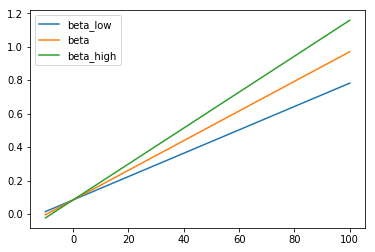

In [26]:
# I plot the 3 slopes, to see what they look like.  
plt.plot(U, alfa+beta_low*U, label = 'beta_low') 
plt.plot(U, alfa+beta*U, label = 'beta') 
plt.plot(U, alfa+beta_high*U, label = 'beta_high') 
plt.legend(loc=0) 
plt.show()   

# Assignment 2

Number: is mortality of boys under 1 year in Denmark from 1901 to 1991. 
It is given in the following table: 

a) Plot the data from the table, and draw the best straight line through the points, by determining the intersection with the y-axis and the slope of the linear model. 

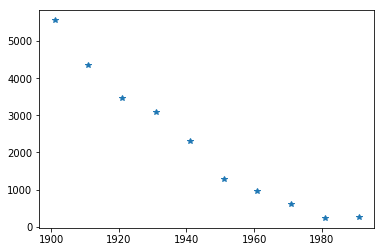

In [30]:
#Number of mortality
# Year
Year= np.array([1901,1911,1921,1931,1941,1951,1961,1971,1981,1991])
Death = np.array([5562,4357,3471,3078,2309,1285,969,602,238,268])
plt.plot(Year,Death,'*')   # the plot plots x, y respectively. In this case year is x and death is y 
plt.show()

In [31]:
#These are 3 different ways of calculating beta:
beta = sum((Year-Year.mean())*(Death-Death.mean()))/sum((Year-Year.mean())**2) 
print('beta1 = ', beta)   
beta = sum((Year*Death-Year.mean()*Death.mean()))/sum((Year-Year.mean())**2) 
print('beta2 = ', beta) 
beta = np.cov(Year,Death)[0,1]/np.var(Year, ddof=1) 
print('beta3 = ', beta) 

#Claulating alfa:
alfa = Death.mean()-beta*Year.mean() 
print('alfa = ', alfa)   

beta1 =  -59.5
beta2 =  -59.500000000000455
beta3 =  -59.5
alfa =  118000.9


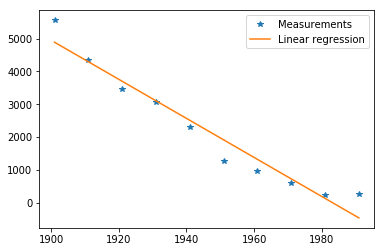

In [32]:
# I plot the line, together with the data, to see if it makes sense. 
Death_pred = alfa + beta*Year # predicts the current, I based on alfa and beta 
plt.plot(Year,Death, '*', label='Measurements') 
plt.plot(Year,Death_pred, label='Linear regression') 
plt.legend(loc=0) # show the labels in the top left corner plt.show() 

In [36]:
#We can use this to check the slope and intersection
import IPython.display 
IPython.display.display(stats.linregress(Year, Death)) 

LinregressResult(slope=-59.5, intercept=118000.9, rvalue=-0.9731620661173196, pvalue=2.197447324421469e-06, stderr=4.974423066897789)

b) Make a residual plot, and a probability plot of the residuals.

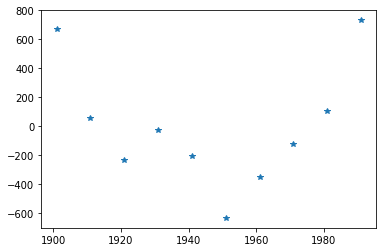

In [39]:
#that is step 4 (4.1 is the residual and 4.2 is the probability)
e = Death-Death_pred # calculates the residuals/error of the model 
plt.plot(Year,e, '*') 
plt.show() 

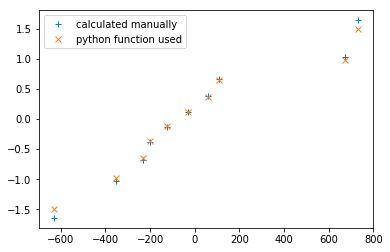

In [40]:
#probability plot:
n=len(Year)   #number of samples
e_sort=np.sort(e)    #the observations are ranked from smallest to largest
j = np.arange(1,n+1) #j is the numbering of/for the errors from 1 to n
ocf = (j-0.5)/n       #observed cumulative frequency, ocf = (j-0.5)/n
plt.plot(e_sort,stats.norm.ppf(ocf),'+', label = 'calculated manually')  #the ordered errors are plotted against the appropiate
#percentile (norm.ppf,uniform.ppf, t.ppf ....) of the ocf.

osm, osr =stats.probplot(e, dist=stats.norm) 
plt.plot(osm[1],osm[0],'x', label = 'python function used') 
plt.legend(loc=0) # show the labels in the top left corner plt.show() 

c) Calculate a 95% confidence interval for the slope. 

In [41]:
SSE = sum(e**2) #sum of square error
s2  = SSE/(n-2) # the Estimated variance of the error 
Sxx = sum((Year-Year.mean())**2) 

s  = np.sqrt(s2)  # estimated standard deviation 
t0 = stats.t.ppf(0.975,n-2) 
beta_low = beta-t0*s/np.sqrt(Sxx) 
beta_high = beta+t0*s/np.sqrt(Sxx) 
print('beta_low = ', beta_low, '\nbeta_high = ', beta_high)   

beta_low =  -70.97104016167215 
beta_high =  -48.02895983832876


d) Based on your answers in b) and c), would you conclude that the assumption of linearity between mortality and year is reasonable? 

In [44]:
print('There is a linear tendency as a slope of 0, is not included in the 95% confidence interval - however more datapoint should be included to make a better model. The residual from 1920 to 1970 is all below zero, meaning that the error is not very normal distributed. Further more we don not expect that this \"linear\" tendency can continue, as it cannot become negative in the future (negative number of death makes no sense)' ) 

There is a linear tendency as a slope of 0, is not included in the 95% confidence interval - however more datapoint should be included to make a better model. The residual from 1920 to 1970 is all below zero, meaning that the error is not very normal distributed. Further more we don not expect that this "linear" tendency can continue, as it cannot become negative in the future (negative number of death makes no sense)


e) What do you think the mortality of boys were in 1966?

In [47]:
#y hat =  alfa + (beta * x) -- x in this case is the year.
print('The regression model estimates that the mortality of boys in 1966 is =',alfa+1966*beta) # 1023.8 

The regression model estimates that the mortality of boys in 1966 is = 1023.8999999999942


# Assignment 3

The average age for 1st time married men in Denmark is given by the following table:

In [49]:
Age   = np.array([25.2,26.5,27.9,29.2,30.2,31.7,32.8,34.0,34.3]) 
Year  = np.array([1971,1976,1981,1986,1991,1996,2001,2006,2011]) 

a) Plot data from the table. Use linear regression to determine a model for the data. 
State how the parameters of the model have been calculated (state also the formulas used for the calculation).
Draw also the linear model on the plot. 


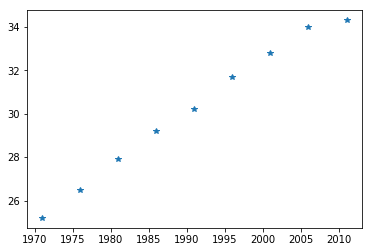

In [50]:
#Year is going to be X (because you can put a year)
#Marriage age is Y because is what you can to know.

#Plotting the data:
plt.plot(Year,Age,'*')   # the plot plots x, y respectively. In this case year is x and death is y 
plt.show()

beta1 =  0.23733333333333329
alfa =  -442.33066666666656


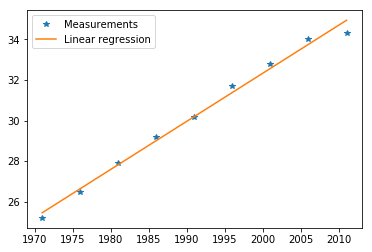

In [54]:
#calculating beta:
beta = sum((Year-Year.mean())*(Age-Age.mean()))/sum((Year-Year.mean())**2) 
print('beta1 = ', beta)   

#Claulating alfa:
alfa = Age.mean()-beta*Year.mean() 
print('alfa = ', alfa)   

# I plot the line, together with the data, to see if it makes sense. 
Age_pred = alfa + beta*Year # predicts the current, I based on alfa and beta 
plt.plot(Year,Age, '*', label='Measurements') 
plt.plot(Year,Age_pred, label='Linear regression') 
plt.legend(loc=0) # show the labels in the top left corner plt.show() 

In [55]:
#We can use this to check the slope and intersection
import IPython.display 
IPython.display.display(stats.linregress(Year, Age)) 

LinregressResult(slope=0.2373333333333333, intercept=-442.3306666666666, rvalue=0.9955948648880211, pvalue=1.8600855077502336e-08, stderr=0.008447785471061538)

b) Plot the residuals and a probability plot of the residuals. Discuss what the plots tells you. 

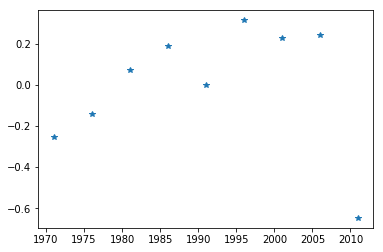

The error does seem to vary with time, as there are only positive errors from 1981 to 2006. It means that the error is not independent of time. 


In [58]:
#that is step 4 (4.1 is the residual and 4.2 is the probability)
e = Age-Age_pred # calculates the residuals/error of the model 
plt.plot(Year,e, '*') 
plt.show() 
print('The error does seem to vary with time, as there are only positive errors from 1981 to 2006. It means that the error is not independent of time. ') 

The error does not seem to be normal distributed as the probability plot does not show a straight line


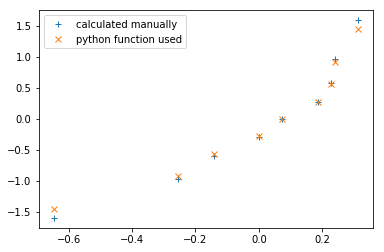

In [60]:
#probability plot:
n=len(Year)   #number of samples
e_sort=np.sort(e)    #the observations are ranked from smallest to largest
j = np.arange(1,n+1) #j is the numbering of/for the errors from 1 to n
ocf = (j-0.5)/n       #observed cumulative frequency, ocf = (j-0.5)/n
plt.plot(e_sort,stats.norm.ppf(ocf),'+', label = 'calculated manually')  #the ordered errors are plotted against the appropiate
#percentile (norm.ppf,uniform.ppf, t.ppf ....) of the ocf.

osm, osr =stats.probplot(e, dist=stats.norm) 
plt.plot(osm[1],osm[0],'x', label = 'python function used') 
plt.legend(loc=0) # show the labels in the top left corner plt.show()
print('The error does not seem to be normal distributed as the probability plot does not show a straight line') 

c) Calculate a 95% confidence interval for the slope and the interception. What does the slope interval tell you?  


In [62]:
SSE = sum(e**2) #sum of square error
s2  = SSE/(n-2) # the Estimated variance of the error 
Sxx = sum((Year-Year.mean())**2) 

s  = np.sqrt(s2)  # estimated standard deviation 
t0 = stats.t.ppf(0.975,n-2) 
beta_low = beta-t0*s/np.sqrt(Sxx) 
beta_high = beta+t0*s/np.sqrt(Sxx) 
print('beta_low = ', beta_low, '\nbeta_high = ', beta_high)   
alfa_low  = alfa-t0*s* np.sqrt(1/n + Year.mean()**2/Sxx) 
alfa_high = alfa+t0*s* np.sqrt(1/n + Year.mean()**2/Sxx) 
print('alfa_low = ', alfa_low, '\nalfa_high = ', alfa_high) 

beta_low =  0.21735749494112855 
beta_high =  0.257309171725538
alfa_low =  -482.10339698575837 
alfa_high =  -402.55793634757475


In [69]:
print('As the slope=0, is not inside the slope interval, it can be rejected that there is no tendency between the year and marrige age.') 
#That means the is a tendency between the year and marriage age.

As the slope=0, is not inside the slope interval, it can be rejected that there is no tendency between the year and marrige age.


d) What do you think the average age for 1st time married men, was in 2003?

In [72]:
print(alfa+beta*2003) 

33.048


# Assignment 4

The number of patients who died of AIDS in DK between 1985 – 1994 are stated in the table. 
The number of deaths are given by ”Number” and the year is given by “Year”. 

a) What is the empirical mean value and the empirical variance for the number of dead AIDS patients? 

b) Plot the data from the table. Use linear regression to determine a model for the data, state how the parameters of the model are calculated (the slope of the linear model and the intersection with the y-axis). Draw also the linear model on the plot.

c) Make a residual drawing for the model from 2) on a graph. State also how the residuals are calculated. 

d) Calculate a 95% confidence interval for the slope.  

e) What is the Coefficient of Determination (𝑅**2). What does this value tell about the model? 

f) How many are going to die from AIDS in 2020 according to your model? 

In [73]:
Death = np.array([28,46,44,63,104,148,172,187,223,236]) 
Year  = np.array([1985,1986,1987,1988,1989,1990,1991,1992,1993,1994]) 
#a) 
print('Emperical (sample) mean = ', Death.mean()) # =  125.1 
print('Emperical (sample) var = ', Death.var(ddof=1)) # =  6111.4 

Emperical (sample) mean =  125.1
Emperical (sample) var =  6111.433333333334


slope, beta =  25.436363636367165
intersection, alfa =  -50480.54545455248


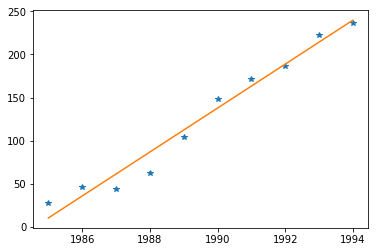

LinregressResult(slope=25.436363636363637, intercept=-50480.545454545456, rvalue=0.9851201565098828, pvalue=2.1066656157853373e-07, stderr=1.5689655485580252)

In [76]:
#b) 
plt.plot(Year,Death, '*') 
beta = sum(Year*Death-Year.mean()*Death.mean())/sum((Year-Year.mean())**2) 
alfa = Death.mean()-beta*Year.mean() 
print('slope, beta = ', beta) 
print('intersection, alfa = ',alfa)   
Death_estimated = Year*beta+alfa 
plt.plot(Year,Death_estimated) 
plt.show()   
#can also be calculated using the linregress-method: 
import IPython.display 
IPython.display.display(stats.linregress(Year, Death)) 

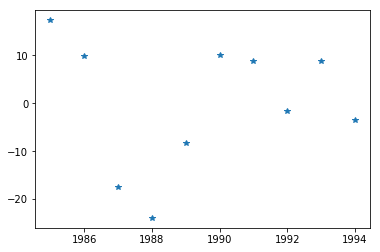

The error seems random and independet of time.  


In [77]:
#c) 
error = Death-Death_estimated 
plt.plot(Year,error,'*') 
plt.show() 
print('The error seems random and independet of time.  ') 

In [81]:
#d ) 
s2_r = sum(error**2)/(len(Year)-2) 
Sxx = sum((Year-Year.mean())**2) 
Beta_low = beta+stats.t.ppf(0.025, df=len(Year)-2)*np.sqrt(s2_r)/np.sqrt(Sxx) 
Beta_high = beta+stats.t.ppf(0.975, df=len(Year)-2)*np.sqrt(s2_r)/np.sqrt(Sxx) 
print('95% confidence interval:') 
print('Beta_low = ',Beta_low) 
print('Beta_high = ',Beta_high) 
print('As the slope=0, is not inside the slope interval, it can be rejected that the variables are independent. The variables are dependent.') 

95% confidence interval:
Beta_low =  21.818322593667386
Beta_high =  29.054404679066945
As the slope=0, is not inside the slope interval, it can be rejected that the variables are independent. The variables are dependent.


In [84]:
#e) 
r_xy =  np.cov(Year, Death)[0,1]/(Death.std(ddof=1)*Year.std(ddof=1)) 
print(r_xy)
print('R2 = ',r_xy**2) 

0.9851201565098826
R2 =  0.9704617227620556


In [83]:
# R2 =  0.97 
print('It seems like the model is a good fit, on the sample, since R2 is close to 1. ') 

It seems like the model is a good fit, on the sample, since R2 is close to 1. 


In [85]:
#f) 
print('The model indicate that ',alfa+beta*2020, ' will die from AIDS in 2020') # 900.9   

The model indicate that  900.9090909091974  will die from AIDS in 2020


# Assignment 5

a strain gauge needs to be calibrated and for this purpose the following measurements are measured. Make a full linear regression analysis.  

In [86]:
#The same as assignment 1

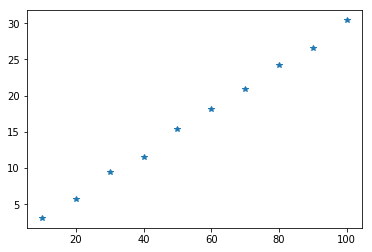

In [87]:
Weight = np.arange(10,110,10) 
Voltage = np.array([3.11,5.68,9.41,11.58,15.42,18.18,20.87,24.25,26.58,30.42]) 
#1) 
plt.plot(Weight, Voltage,'*') 
plt.show() 

In [89]:
#2) print('There is no outliers. ')   

alfa =  -0.014000000000002899 
beta =  0.3011636363636364


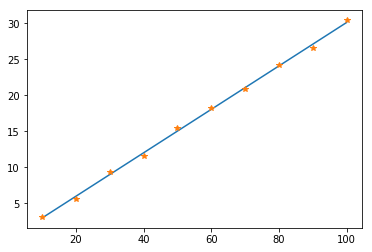

In [91]:
#3) 
beta = np.cov(Weight,Voltage)[0,1]/Weight.var(ddof=1) 
alfa = Voltage.mean()-beta*Weight.mean() 
print('alfa = ', alfa, '\nbeta = ', beta)   
Voltage_estimated = alfa+beta*Weight 
plt.plot(Weight, Voltage_estimated) 
plt.plot(Weight, Voltage,'*') 
plt.show()

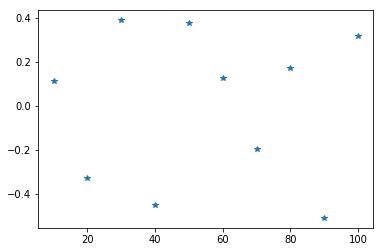

The error seams independent of the weight


In [92]:
#4.1) 
error = Voltage-Voltage_estimated 
plt.plot(Weight, error, '*') 
plt.show() 
print('The error seams independent of the weight')  

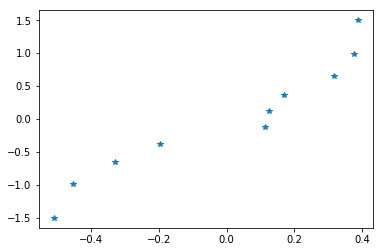

In [93]:
#4.2) 
osm , osr= stats.probplot(error, dist=stats.norm)   
plt.plot(osm[1], osm[0], '*') 
plt.show()

In [96]:
#5.1) 
SSe = sum(error**2) 
Sxx = sum(Weight**2) 
se_beta = np.sqrt(error.var(ddof=2)/Sxx)   #standard error
t=beta/se_beta 
prob = stats.t.sf(t, df=10-2 ) 
print('p_val = ', 2*prob)   

# OR 
var_e = SSe/(len(Weight)-2) 
se_beta = np.sqrt(var_e/Sxx) 
t=beta/se_beta 
prob = stats.t.sf(t, df=10-2 ) 
print('p_val = ', 2*prob) 

p_val =  2.352914273828276e-15
p_val =  2.352914273828276e-15


In [97]:
#5.2) 
r_xy = np.cov(Weight, Voltage)[0,1]/(Weight.std(ddof=1)*Voltage.std(ddof=1)) 
print('r_xy = ', r_xy) 
print('R^2 = ', r_xy**2) 
print('Because this is bigger than 0.8 there is a high correlation') 

r_xy =  0.9992898990851429
R^2 =  0.9985803024135951
Because this is bigger than 0.8 there is a high correlation


In [100]:
#6) 
beta_low = beta+stats.t.ppf(0.025,df=len(error)-2)*error.std(ddof=2)/np.sqrt(Sxx) 
print('beta_low = ', beta_low) 
beta_high = beta+stats.t.ppf(0.975,df=len(error)-2)*np.sqrt(var_e/Sxx) 
print('beta_high = ', beta_high)   

alfa_low = alfa+stats.t.ppf(0.025,df=len(error)-2)*np.sqrt(var_e*(1/len(error) + Weight.mean()/Sxx)) 
print('alfa_low = ', alfa_low) 
alfa_high = alfa+stats.t.ppf(0.975,df=len(error)-2)*np.sqrt(var_e*(1/len(error) + Weight.mean()/Sxx)) 
print('alfa_high = ', alfa_high)

beta_low =  0.296877947342169
beta_high =  0.30544932538510383
alfa_low =  -0.2818127035224022
alfa_high =  0.2538127035223963
